In [1]:
import xarray as xr
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# open dataset
f = xr.open_dataset('seNorge2018_RR_1957_2017.nc')

In [55]:
# f['time'][:]
# f.summary
f['rr'] # - units: kg/m2 -> precipitation data 

<xarray.DataArray 'rr' (time: 22280, Y: 1550, X: 1195)>
[41268130000 values with dtype=float32]
Coordinates:
  * X        (X) float64 -7.45e+04 -7.35e+04 -7.25e+04 ... 1.118e+06 1.12e+06
  * Y        (Y) float64 8e+06 7.998e+06 7.998e+06 ... 6.452e+06 6.450e+06
  * time     (time) datetime64[ns] 1957-01-01T06:00:00 ... 2017-12-31T06:00:00
    lon      (Y, X) float32 ...
    lat      (Y, X) float32 ...
Attributes:
    units:          kg/m^2
    grid_mapping:   UTM_Zone_33
    long_name:      daily total precipitation (06-06)
    standard_name:  precipitation_amount
    cell_methods:   time: sum
    version:        1.0
    prod_date:      2018-12-07

In [57]:
# round dates to 'day'
f_days = f.assign(date = lambda f: f.time.dt.round('D')) 
# add weekday
f_days_of_week = f_days.assign(day_of_week = lambda f: f_days.date.dt.weekday) 

In [56]:
# whats it look like: 
f_days_of_week['day_of_week']

<xarray.DataArray 'day_of_week' (time: 22280)>
array([1, 2, 3, ..., 4, 5, 6])
Coordinates:
  * time     (time) datetime64[ns] 1957-01-01T06:00:00 ... 2017-12-31T06:00:00

In [ ]:
# the entire dataset
# groups:
# a = f_days_of_week.groupby("day_of_week").groups

# group by day of week
# xmean = f_days_of_week.groupby('day_of_week').mean()

In [ ]:
# what xmean looks like
# xmean

In [58]:
## ----- take subset:

# take only 1 year:
rain2016 = f_days_of_week.sel(time=slice("2016-01-01", "2016-12-31"))
# group by day of week
mean2016 = rain2016.groupby('day_of_week').mean()

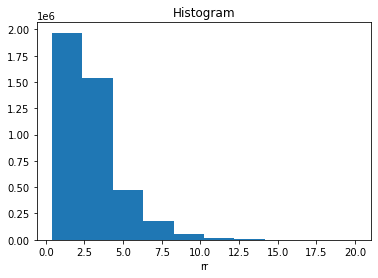

In [114]:
mean2016_rain = mean2016['rr'].plot()
# mean2016_rain.plot()

In [90]:
# separate days:
day0 = mean2016_rain.isel(day_of_week=0)
day1 = mean2016_rain.isel(day_of_week=1)
day2 = mean2016_rain.isel(day_of_week=2)
day3 = mean2016_rain.isel(day_of_week=3)
day4 = mean2016_rain.isel(day_of_week=4)
day5 = mean2016_rain.isel(day_of_week=5)
day6 = mean2016_rain.isel(day_of_week=6)

In [131]:
# day0.plot(vmin=0, vmax=20)
# day1.plot(vmin=0, vmax=20)
# day2.plot(vmin=0, vmax=20)
# day3.plot(vmin=0, vmax=20)
# day4.plot(vmin=0, vmax=20)
# day5.plot(vmin=0, vmax=20)
# day6.plot(vmin=0, vmax=20)

